In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

In [8]:
df = pd.read_csv("../summary_data/150bp/all_tools_TRB.csv")
df

,Sample,CDR3,nReads_TCR,nReads_MIXCR,nReads_IMREP,nReads_TRUST4,sample_type,total_reads_TCR,total_reads_MIXCR,total_reads_IMREP,total_reads_TRUST4,frequency_TCR,frequency_MIXCR,frequency_IMREP,frequency_TRUST4,clonal_type
0,MP-11-28-12RNA_S2,CASSETGAETQYF,4.0,0.0,0.0,0.0,PBMC,18617.0,55.0,111.0,186.0,0.000215,0.0,0.0,0.000000,polyclonal
1,MP-11-28-12RNA_S2,CASSFETVNNSPLHF,2.0,0.0,0.0,0.0,PBMC,18617.0,55.0,111.0,186.0,0.000107,0.0,0.0,0.000000,polyclonal
2,MP-11-28-12RNA_S2,CAISESGGSSYNEQFF,2.0,0.0,0.0,0.0,PBMC,18617.0,55.0,111.0,186.0,0.000107,0.0,0.0,0.000000,polyclonal
3,MP-11-28-12RNA_S2,CASSVSYRGRFGYTF,4.0,0.0,0.0,0.0,PBMC,18617.0,55.0,111.0,186.0,0.000215,0.0,0.0,0.000000,polyclonal
4,MP-11-28-12RNA_S2,CASTRWGDNEQFF,2.0,0.0,0.0,0.0,PBMC,18617.0,55.0,111.0,186.0,0.000107,0.0,0.0,0.000000,polyclonal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151597,SAR-11-14-12RNA_S1,CASSEWGPGTGDSYEQYF,0.0,0.0,0.0,3.0,PBMC,104779.0,158.0,1354.0,2006.0,0.000000,0.0,0.0,0.001496,polyclonal
151598,SAR-11-14-12RNA_S1,CASSVPGQGSSMYF,0.0,0.0,0.0,2.0,PBMC,104779.0,158.0,1354.0,2006.0,0.000000,0.0,0.0,0.000997,polyclonal
151599,SAR-11-14-12RNA_S1,CASSPRGDEQFF,0.0,0.0,0.0,2.0,PBMC,104779.0,158.0,1354.0,2006.0,0.000000,0.0,0.0,0.000997,polyclonal
151600,SAR-11-14-12RNA_S1,CASSLASVLQPQHF,0.0,0.0,0.0,2.0,PBMC,104779.0,158.0,1354.0,2006.0,0.000000,0.0,0.0,0.000997,polyclonal


In [9]:
# TCR-Seq
TCR = df[df.nReads_TCR != 0]
clonotype_count_TCR = TCR.groupby(['Sample'], sort=False).size().reset_index(name='clonotype_count_TCR')

# MIXCR
MIXCR = df[df.nReads_MIXCR != 0]
clonotype_count_MIXCR = MIXCR.groupby(['Sample'], sort=False).size().reset_index(name='clonotype_count_tool')
clonotype_count_MIXCR['tool'] = 'MIXCR'

# IMREP
IMREP = df[df.nReads_IMREP != 0]
clonotype_count_IMREP = IMREP.groupby(['Sample'], sort=False).size().reset_index(name='clonotype_count_tool')
clonotype_count_IMREP['tool'] = 'IMREP'

# TRUST4
TRUST4 = df[df.nReads_TRUST4 != 0]
clonotype_count_TRUST4 = TRUST4.groupby(['Sample'], sort=False).size().reset_index(name='clonotype_count_tool')
clonotype_count_TRUST4['tool'] = 'TRUST4'

clonotype_count = pd.concat([clonotype_count_MIXCR,clonotype_count_IMREP,clonotype_count_TRUST4])
clonotype_count = pd.merge(clonotype_count, clonotype_count_TCR, how='outer', on=['Sample'])
clonal_type = df[['Sample','sample_type','clonal_type']].drop_duplicates(keep='first')
clonotype_count = pd.merge(clonotype_count, clonal_type, how='inner', on=['Sample'])
clonotype_count['relative_error'] = np.abs(clonotype_count['clonotype_count_TCR'] - clonotype_count['clonotype_count_tool'])/clonotype_count['clonotype_count_TCR']

clonotype_count

,Sample,clonotype_count_tool,tool,clonotype_count_TCR,sample_type,clonal_type,relative_error
0,MP-11-28-12RNA_S2,20,MIXCR,5440,PBMC,polyclonal,0.996324
1,MP-11-28-12RNA_S2,33,IMREP,5440,PBMC,polyclonal,0.993934
2,MP-11-28-12RNA_S2,50,TRUST4,5440,PBMC,polyclonal,0.990809
3,CMT-baseline1C_CAGATC,34,MIXCR,9354,melanoma,polyclonal,0.996365
4,CMT-baseline1C_CAGATC,92,IMREP,9354,melanoma,polyclonal,0.990165
5,CMT-baseline1C_CAGATC,200,TRUST4,9354,melanoma,polyclonal,0.978619
6,LEK-baseline_CGATGT,17,MIXCR,16417,melanoma,polyclonal,0.998964
7,LEK-baseline_CGATGT,28,IMREP,16417,melanoma,polyclonal,0.998294
8,LEK-baseline_CGATGT,58,TRUST4,16417,melanoma,polyclonal,0.996467
9,LEK-OT110712A_CCGTCC,44,MIXCR,19018,melanoma,polyclonal,0.997686


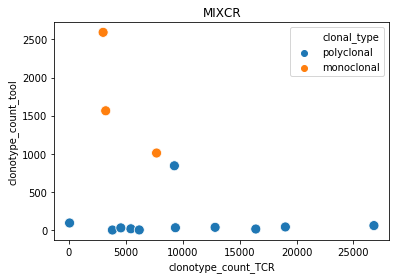

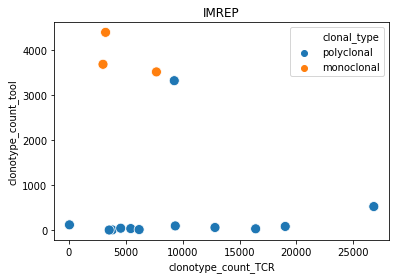

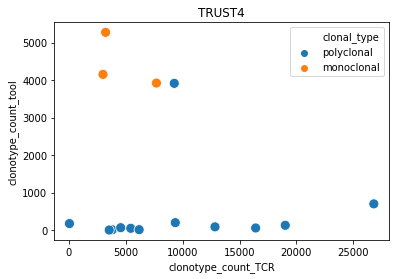

In [10]:
tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    count = clonotype_count.loc[(clonotype_count['tool'] == tool)]
    ax = sns.scatterplot(x = 'clonotype_count_TCR', y = 'clonotype_count_tool', hue = 'clonal_type', s = 100, data = count)
    ax.set(title = tool)
    ax.grid(False)
    plt.show()

Relative error of clonotype count 

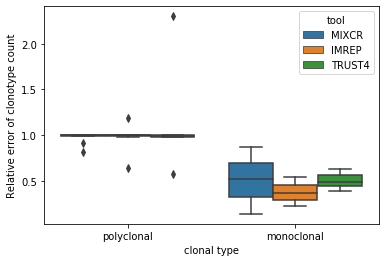

In [14]:
ax = sns.boxplot(x='clonal_type',y='relative_error', hue='tool', data=clonotype_count)

ax.set_xlabel('clonal type',fontsize=10)
ax.set_ylabel('Relative error of clonotype count',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()